In [1]:
import pandas as pd
import pandas_datareader as pdr
df=pd.read_csv('Apple_Stock.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-18 00:00:00+00:00,94.56,95.21,93.89,94.16,42062391,22.081032,22.232815,21.924578,21.987626,168249564,0.0,1.0
1,AAPL,2016-05-19 00:00:00+00:00,94.20,94.64,93.57,94.64,30442100,21.996967,22.099713,21.849853,22.099713,121768400,0.0,1.0
2,AAPL,2016-05-20 00:00:00+00:00,95.22,95.43,94.52,94.64,32025968,22.235151,22.284188,22.071691,22.099713,128103872,0.0,1.0
3,AAPL,2016-05-23 00:00:00+00:00,96.43,97.19,95.67,95.87,38018643,22.517702,22.695172,22.340232,22.386934,152074572,0.0,1.0
4,AAPL,2016-05-24 00:00:00+00:00,97.90,98.09,96.84,97.22,35140174,22.860967,22.905334,22.613442,22.702177,140560696,0.0,1.0


In [2]:
df1=df.reset_index()['close']
df1.head(3)

0    94.56
1    94.20
2    95.22
Name: close, dtype: float64

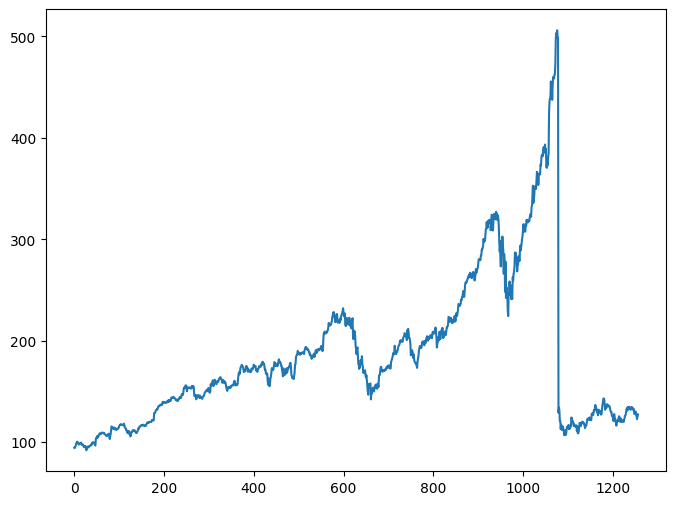

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(df1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.00608622],
       [0.00521676],
       [0.00768023],
       ...,
       [0.07421809],
       [0.07953146],
       [0.08552107]])

In [5]:
train_size=int(0.65*len(df1))
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

train_data,test_data

(array([[0.00608622],
        [0.00521676],
        [0.00768023],
        [0.01060258],
        [0.01415288],
        [0.01830697],
        [0.02021495],
        [0.02007004],
        [0.01888661],
        [0.01550537],
        [0.01371815],
        [0.01420118],
        [0.01591595],
        [0.01688202],
        [0.01666465],
        [0.01837942],
        [0.01639899],
        [0.01280039],
        [0.01309021],
        [0.01231735],
        [0.01330757],
        [0.0079459 ],
        [0.00739041],
        [0.0093467 ],
        [0.00847724],
        [0.00980558],
        [0.00328463],
        [0.        ],
        [0.00374351],
        [0.00569979],
        [0.008598  ],
        [0.00929839],
        [0.00712474],
        [0.00842893],
        [0.00941915],
        [0.01120638],
        [0.01193093],
        [0.0129936 ],
        [0.01166526],
        [0.01630238],
        [0.01627823],
        [0.01881415],
        [0.01891076],
        [0.01912812],
        [0.01784809],
        [0

In [6]:
def create_dataset(dataset,time_step=1):
    data_X,data_y=[],[]
    for i in range(len(dataset)-1-time_step):
        a=dataset[i:(i+time_step),0]
        data_X.append(a)
        data_y.append(dataset[i+time_step,0])
    return np.array(data_X),np.array(data_y)

In [7]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)
X_train.dtype,X_test.dtype

(716, 100, 1)
(716,)
(339, 100, 1)
(339,)


(dtype('float64'), dtype('float64'))

In [9]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 292ms/step - loss: 0.0094 - val_loss: 0.0508
Epoch 2/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0024 - val_loss: 0.0275
Epoch 3/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0012 - val_loss: 0.0240
Epoch 4/100
12/12 [==============================] - 2s 171ms/step - loss: 7.5306e-04 - val_loss: 0.0212
Epoch 5/100
12/12 [==============================] - 2s 171ms/step - loss: 5.0845e-04 - val_loss: 0.0200
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 4.4134e-04 - val_loss: 0.0197
Epoch 7/100
12/12 [==============================] - 2s 197ms/step - loss: 4.2235e-04 - val_loss: 0.0192
Epoch 8/100
12/12 [==============================] - 2s 193ms/step - loss: 3.8942e-04 - val_loss: 0.0188
Epoch 9/100
12/12 [==============================] - 2s 189ms/step - loss: 3.8116e-04 - val_loss: 0.0185
Epoch 10/100
12/12 [==============================] - 3s 266ms/step

12/12 [==============================] - 2s 185ms/step - loss: 1.6341e-04 - val_loss: 0.0078
Epoch 79/100
12/12 [==============================] - 3s 219ms/step - loss: 1.3639e-04 - val_loss: 0.0072
Epoch 80/100
12/12 [==============================] - 3s 247ms/step - loss: 1.5165e-04 - val_loss: 0.0082
Epoch 81/100
12/12 [==============================] - 3s 229ms/step - loss: 1.2992e-04 - val_loss: 0.0071
Epoch 82/100
12/12 [==============================] - 3s 212ms/step - loss: 1.4318e-04 - val_loss: 0.0094
Epoch 83/100
12/12 [==============================] - 2s 203ms/step - loss: 1.8422e-04 - val_loss: 0.0078
Epoch 84/100
12/12 [==============================] - 2s 206ms/step - loss: 1.8373e-04 - val_loss: 0.0071
Epoch 85/100
12/12 [==============================] - 3s 213ms/step - loss: 1.3073e-04 - val_loss: 0.0072
Epoch 86/100
12/12 [==============================] - 3s 235ms/step - loss: 1.2620e-04 - val_loss: 0.0077
Epoch 87/100
12/12 [==============================] - 3s 22

In [12]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

11/11 [==============================] - 0s 27ms/step


242.56378249413635

In [14]:
math.sqrt(mean_squared_error(y_train,train_predict))

173.0150194792131

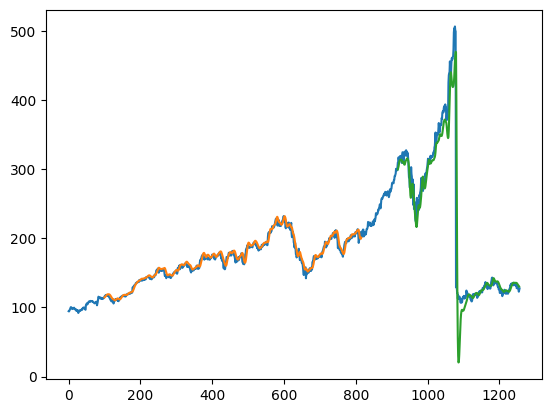

In [15]:
look_back=100
train_predict_plot=np.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict
test_predict_plot=np.empty_like(df1)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+look_back*2+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [16]:
len(test_data)

440

In [26]:
x_input=test_data[340:].reshape(1,-1) #to predict the data for day 441, we needa info about the previous 100 days
x_input.shape,x_input.dtype

((1, 100), dtype('float64'))

In [18]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.09622026325323027,
 0.09399830938292478,
 0.09643762830576016,
 0.1078372177273276,
 0.10344161333172322,
 0.10066417099384131,
 0.09817654872599926,
 0.09025480014491002,
 0.09411906774544135,
 0.08346818017147686,
 0.09390170269291145,
 0.09663084168578676,
 0.08921627822726722,
 0.08878154812220748,
 0.09382924767540149,
 0.08904721651974398,
 0.08477237048665617,
 0.08643883588938531,
 0.0965825383407801,
 0.10827194783238739,
 0.11358531578311795,
 0.12288370969689646,
 0.12346334983697618,
 0.1208066658616109,
 0.10880328462746044,
 0.09641347663325686,
 0.10167854123898076,
 0.10373143340176308,
 0.10119550778891437,
 0.10952783480256004,
 0.10800627943485083,
 0.10836855452240066,
 0.10619490399710177,
 0.10469750030189587,
 0.10406955681680954,
 0.10464919695688926,
 0.0993841323511653,
 0.09370848931288492,
 0.09097935032000967,
 0.0913657770800628,
 0.08201907982127762,
 0.0816809564062311,
 0.08044922110856176,
 0.06991909189711384,
 0.07057118705470353,
 0.0863422291993

In [29]:
i=0
nsteps=100
lst_output=[]
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,nsteps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist()[0])
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input=x_input.reshape((1,nsteps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat.tolist()[0])
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i+=1

print(lst_output)

0 day input [0.09399831 0.09643763 0.10783722 0.10344161 0.10066417 0.09817655
 0.0902548  0.09411907 0.08346818 0.0939017  0.09663084 0.08921628
 0.08878155 0.09382925 0.08904722 0.08477237 0.08643884 0.09658254
 0.10827195 0.11358532 0.12288371 0.12346335 0.12080667 0.10880328
 0.09641348 0.10167854 0.10373143 0.10119551 0.10952783 0.10800628
 0.10836855 0.1061949  0.1046975  0.10406956 0.1046492  0.09938413
 0.09370849 0.09097935 0.09136578 0.08201908 0.08168096 0.08044922
 0.06991909 0.07057119 0.08634223 0.07989373 0.07250332 0.06784205
 0.07095761 0.05873687 0.07014853 0.06747977 0.0722618  0.0700157
 0.07716459 0.08098056 0.07902427 0.06880811 0.06750392 0.07571549
 0.0736626  0.06774544 0.06895302 0.07045043 0.07088516 0.06728656
 0.07272069 0.07477358 0.08177756 0.08252626 0.0866079  0.09254921
 0.09891317 0.09467456 0.10237894 0.09658254 0.102548   0.10172684
 0.10336916 0.09919092 0.10013283 0.09636517 0.10211327 0.10307934
 0.10228233 0.10032605 0.10008453 0.09520589 0.0978

8 day output [[0.09865517]]
9 day input [0.0939017  0.09663084 0.08921628 0.08878155 0.09382925 0.08904722
 0.08477237 0.08643884 0.09658254 0.10827195 0.11358532 0.12288371
 0.12346335 0.12080667 0.10880328 0.09641348 0.10167854 0.10373143
 0.10119551 0.10952783 0.10800628 0.10836855 0.1061949  0.1046975
 0.10406956 0.1046492  0.09938413 0.09370849 0.09097935 0.09136578
 0.08201908 0.08168096 0.08044922 0.06991909 0.07057119 0.08634223
 0.07989373 0.07250332 0.06784205 0.07095761 0.05873687 0.07014853
 0.06747977 0.0722618  0.0700157  0.07716459 0.08098056 0.07902427
 0.06880811 0.06750392 0.07571549 0.0736626  0.06774544 0.06895302
 0.07045043 0.07088516 0.06728656 0.07272069 0.07477358 0.08177756
 0.08252626 0.0866079  0.09254921 0.09891317 0.09467456 0.10237894
 0.09658254 0.102548   0.10172684 0.10336916 0.09919092 0.10013283
 0.09636517 0.10211327 0.10307934 0.10228233 0.10032605 0.10008453
 0.09520589 0.09781427 0.08648714 0.08709093 0.09105181 0.09218693
 0.08407197 0.08180171 

18 day output [[0.11055918]]
19 day input [0.11358532 0.12288371 0.12346335 0.12080667 0.10880328 0.09641348
 0.10167854 0.10373143 0.10119551 0.10952783 0.10800628 0.10836855
 0.1061949  0.1046975  0.10406956 0.1046492  0.09938413 0.09370849
 0.09097935 0.09136578 0.08201908 0.08168096 0.08044922 0.06991909
 0.07057119 0.08634223 0.07989373 0.07250332 0.06784205 0.07095761
 0.05873687 0.07014853 0.06747977 0.0722618  0.0700157  0.07716459
 0.08098056 0.07902427 0.06880811 0.06750392 0.07571549 0.0736626
 0.06774544 0.06895302 0.07045043 0.07088516 0.06728656 0.07272069
 0.07477358 0.08177756 0.08252626 0.0866079  0.09254921 0.09891317
 0.09467456 0.10237894 0.09658254 0.102548   0.10172684 0.10336916
 0.09919092 0.10013283 0.09636517 0.10211327 0.10307934 0.10228233
 0.10032605 0.10008453 0.09520589 0.09781427 0.08648714 0.08709093
 0.09105181 0.09218693 0.08407197 0.08180171 0.07421809 0.07953146
 0.08552107 0.08791294 0.08791294 0.087986   0.08906537 0.09042606
 0.09188228 0.0933357

27 day output [[0.12253959]]
28 day input [0.10952783 0.10800628 0.10836855 0.1061949  0.1046975  0.10406956
 0.1046492  0.09938413 0.09370849 0.09097935 0.09136578 0.08201908
 0.08168096 0.08044922 0.06991909 0.07057119 0.08634223 0.07989373
 0.07250332 0.06784205 0.07095761 0.05873687 0.07014853 0.06747977
 0.0722618  0.0700157  0.07716459 0.08098056 0.07902427 0.06880811
 0.06750392 0.07571549 0.0736626  0.06774544 0.06895302 0.07045043
 0.07088516 0.06728656 0.07272069 0.07477358 0.08177756 0.08252626
 0.0866079  0.09254921 0.09891317 0.09467456 0.10237894 0.09658254
 0.102548   0.10172684 0.10336916 0.09919092 0.10013283 0.09636517
 0.10211327 0.10307934 0.10228233 0.10032605 0.10008453 0.09520589
 0.09781427 0.08648714 0.08709093 0.09105181 0.09218693 0.08407197
 0.08180171 0.07421809 0.07953146 0.08552107 0.08791294 0.08791294
 0.087986   0.08906537 0.09042606 0.09188228 0.0933357  0.09474453
 0.09609777 0.09739856 0.09865517 0.09987687 0.10107268 0.10225097
 0.10341945 0.104585

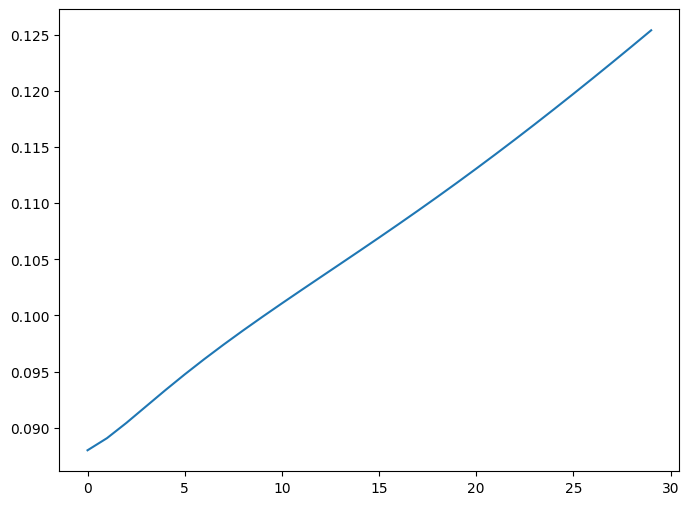

In [31]:
plt.figure(figsize=(8,6))
plt.plot(lst_output)